In [1]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

cdir = os.getcwd() #get current directory
os.chdir(cdir) #make sure you are in the current directory

#mother directory (i.e. one folder 'above')
mother_dir = os.path.abspath(os.path.join(cdir, os.pardir))
#verify  mother directory
print(f"Mother directory {mother_dir} given")

#get the path to the py directory
py_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'py'))
#add the py directory to the system path
if py_dir not in sys.path:
    sys.path.append(py_dir)

#verify the directory has been added
print(f"Added {py_dir} to sys.path")
print(f"System path: {sys.path}")

Mother directory /Users/ronja/Documents/GitHub/adaptive-Wilson-Cowan-continuum/cpu-run given
Added /Users/ronja/Documents/GitHub/adaptive-Wilson-Cowan-continuum/cpu-run/py to sys.path
System path: ['/Users/ronja/Documents/GitHub/adaptive-Wilson-Cowan-continuum/cpu-run/notebooks', '/Users/ronja/opt/anaconda3/lib/python39.zip', '/Users/ronja/opt/anaconda3/lib/python3.9', '/Users/ronja/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages', '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/ronja/Documents/GitHub/adaptive-Wilson-Cowan-continuum/cpu-run/py']


In [3]:
#Import necesarry functions from python-scripts of py-folder

#package to individually set parameters
from params import setParams

from integration import run

#we summarised the simulation as well as the identification of fps & their stability in the following
from runFuncs import run_activity, run_fixedpoints, run_violation

#functions that make up the 3d polynomial
from turings import c0, c1, c2

In [4]:
ee = 0.4
ii = -0.1
params = {'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 30*1000, 'beta_a': 10, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

#compute fp-values of uncoupled system and their corresponding stability.
fps, stab = run_fixedpoints(params)
vio = run_violation(params, fps[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps), str(stab)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps[0]), str(vio)))

for the fixed points [[0.14881986 0.46538231]
 [0.86592662 0.9999075 ]
 [0.97239587 0.99998403]], we have the corresponding stability [1, 0, 1] (1=stable, 0=unstable)
the down-fp [0.14881986 0.46538231] undergoes the violations ((1, 0.652), (0, 0), (0, 0)) (0=no vio, 1=turing)


In [5]:
#set the range for increasing wavenumber k
k = np.linspace(-3,3,801)
zero_line = np.linspace(0, 0, len(k))

In [6]:
params = setParams(params)

#check stability for donw-state
fp= fps[0]

c_20 = c2(k, fp, params)
c_10 = c1(k, fp, params)
c_00 = c0(k, fp, params)

cs0 = [c_00, c_10, c_20]

vio = run_violation(params, fp)
static, dynamic, double = vio[0], vio[1], vio[2]

print('For fixed point %s, we have the (in-)stability' %str(fp))
print('1. static: %s (0=no, 1=yes; wavenumber)' %str(static))
print('2. dynamic: %s (0=no, 1=yes; wavenumber)' %str(dynamic))
print('3. double: %s (0=no, 1=yes; wavenumber)' %str(double))


#again for visualisation reasons: let the simulation run, init. around fp:
ue0, ui0, adaps0 = run(params, fp=fp, wavenumber=vio[0][1], itype='rungekutta')

For fixed point [0.14881986 0.46538231], we have the (in-)stability
1. static: (1, 0.652) (0=no, 1=yes; wavenumber)
2. dynamic: (0, 0) (0=no, 1=yes; wavenumber)
3. double: (0, 0) (0=no, 1=yes; wavenumber)


In [7]:
ee = -0.3
ii = -0.68
params_hopf = {'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 30*1000, 'beta_a': 20, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

#compute fp-values of uncoupled system and their corresponding stability.
fps_hopf, stab_hopf = run_fixedpoints(params_hopf)
vio_hopf = run_violation(params_hopf, fps_hopf[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_hopf), str(stab_hopf)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps_hopf[0]), str(vio_hopf)))

for the fixed points [[0.19864766 0.23504738]], we have the corresponding stability [0] (1=stable, 0=unstable)
the down-fp [0.19864766 0.23504738] undergoes the violations ((1, 0.524), (0, 0), (0, 0)) (0=no vio, 1=turing)


In [8]:
params_hopf = setParams(params_hopf)

#check stability for donw-state
fp_hopf = fps_hopf[0]

c_21 = c2(k, fp_hopf, params_hopf)
c_11 = c1(k, fp_hopf, params_hopf)
c_01 = c0(k, fp_hopf, params_hopf)

cs1 = [c_01, c_11, c_21]

vio_hopf = run_violation(params_hopf, fp_hopf)
static_hopf, dynamic_hopf, double_hopf = vio_hopf[0], vio_hopf[1], vio_hopf[2]

print('For fixed point %s, we have the (in-)stability' %str(fp))
print('1. static: %s (0=no, 1=yes; wavenumber)' %str(static_hopf))
print('2. dynamic: %s (0=no, 1=yes; wavenumber)' %str(dynamic_hopf))
print('3. double: %s (0=no, 1=yes; wavenumber)' %str(double_hopf))


#again for visualisation reasons: let the simulation run, init. around fp:
ue_hopf, ui_hopf, adaps_hopf = run(params_hopf, fp=fp_hopf, wavenumber=vio_hopf[0][1], itype='rungekutta')

For fixed point [0.14881986 0.46538231], we have the (in-)stability
1. static: (1, 0.524) (0=no, 1=yes; wavenumber)
2. dynamic: (0, 0) (0=no, 1=yes; wavenumber)
3. double: (0, 0) (0=no, 1=yes; wavenumber)


In [9]:
#plotting parameters
tfs, fs, tickfs = 25, 20, 15
lw=2

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/4180662855.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels, fontsize=tickfs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/4180662855.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=tickfs)


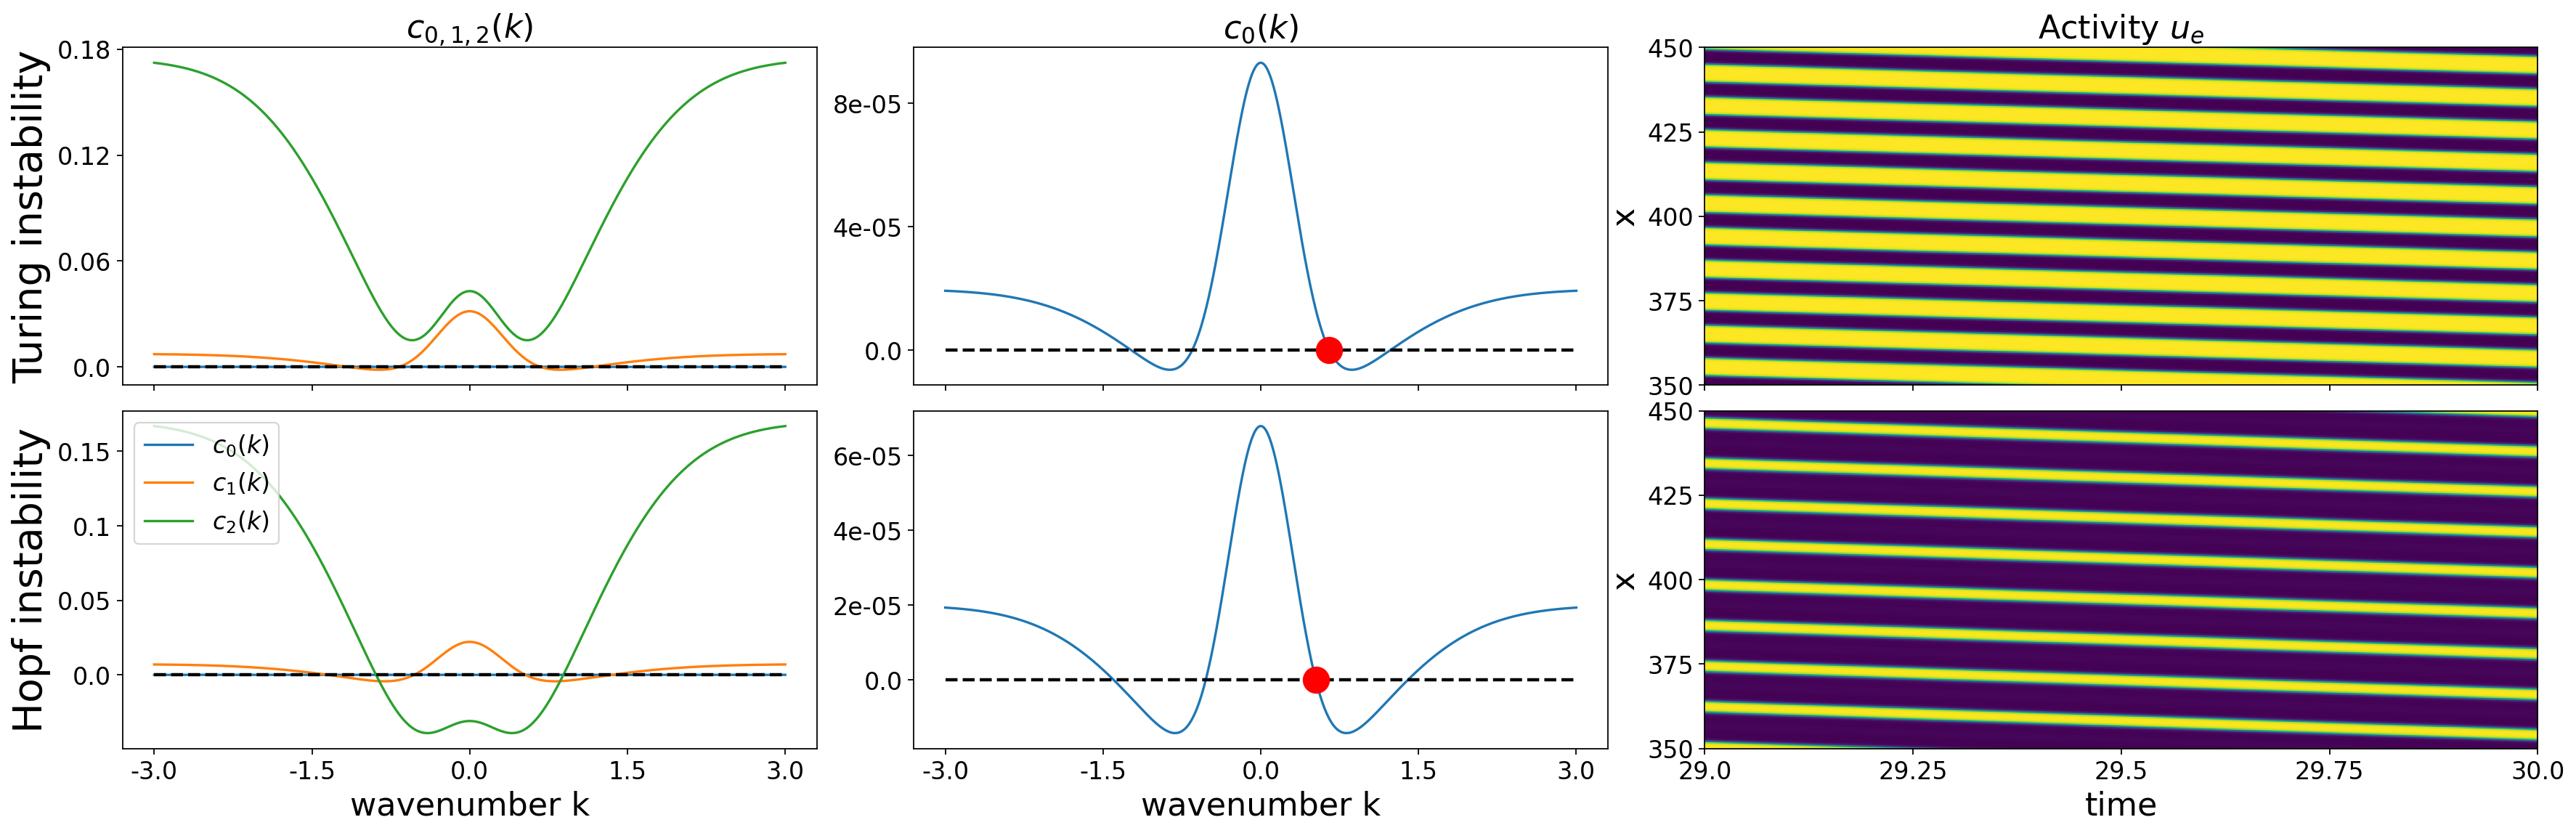

In [10]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(22,7), dpi=160, 
                                                       sharex='col',  
                                                       gridspec_kw={'width_ratios': [1., 1., 1.2]})

zero_line = np.linspace(0,0, len(k))

col1 = [ax0, ax3]
col2 = [ax1, ax4]
col3 = [ax2, ax5]
all_cs = [cs0, cs1]
all_c0s = [c_00, c_01]
all_c1s = [c_10, c_11]
all_c2s = [c_20, c_21]
all_ues = [ue0, ue_hopf]
nodes = [700, 900]

titles = ['Turing instability', 'Hopf instability']

#plot the c-functions per state over k
for idx, ax in enumerate(col1):
    for i, c in enumerate(all_cs[idx]):
        ax.plot(k, c, label=r'$c_%i(k)$' %i)
        
    ax.plot(k, zero_line, ls='dashed', c='black', lw=2)
    ax.set_ylabel(titles[idx], fontsize=tfs)

    #ax.set_xlabel('wavenumber k', fontsize=fs)
    
ax0.set_title(r'$c_{0,1,2}(k)$', fontsize=tfs)

#plot a close-up of c_0 per state
for idx, ax in enumerate(col2):
    ax.plot(k, all_c0s[idx], label=r'$c_0(k)$')
    #ax.plot(k, all_c1s[idx], label=r'$c_1(k)$')
    ax.plot(k, zero_line, ls='dashed', c='black', lw=2)
    #ax.set_title(titles[idx])


ax3.legend(loc='upper left', fontsize=tickfs)
    
#plot the corresponding activites
time_labels = np.linspace(29,params.end_t*0.001,5)
space_labels = np.linspace(nodes[1]*params.dx, params.dx*nodes[0], 5).astype(int)

for idx, ax in enumerate(col3):
    ax.imshow(all_ues[idx].T[nodes[0]:nodes[1],int(29*1000*(1/params.dt)):], vmin=0, vmax=1, aspect='auto')
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=tickfs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=tickfs)

    ax.set_ylabel('x', fontsize=fs)

ax0.set_title(r'$c_{0,1,2}(k)$', fontsize=fs)
ax1.set_title(r'$c_0(k)$', fontsize=fs)
ax2.set_title(r'Activity $u_e$', fontsize=fs)

for ax in [ax3, ax4]:
    ax.set_xticks(np.linspace(-3,3,5), np.linspace(-3,3,5), fontsize=tickfs)
    ax.set_xlabel('wavenumber k', fontsize=fs)
ax5.set_xlabel('time', fontsize=fs)


ax0.set_yticks(np.linspace(0,0.175,4), np.linspace(0,0.175,4).round(decimals=2), fontsize=tickfs)
ax3.set_yticks(np.linspace(0,0.15,4), np.linspace(0,0.15,4).round(decimals=2), fontsize=tickfs)

ax1.set_yticks(np.linspace(0,8e-5,3), np.linspace(0,8e-5,3), fontsize=tickfs)
ax4.set_yticks(np.linspace(0,6e-5,4), np.linspace(0,6e-5,4), fontsize=tickfs)


ax1.scatter(vio[0][1], 0, s=250, c='red', zorder=2)
ax4.scatter(vio_hopf[0][1], 0, s=250, c='red', zorder=2)
  
    
fig.tight_layout(pad=0.1)

# Visualisation of adaptation vs. h-current mechanism

In [11]:
from analysis import F_e, F_i, F_a, derivF_a

In [12]:
ee = 0.5
ii = 0.01
params = {'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 10*1000, 'beta_a': 10, 'dt': 0.5,
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

#compute fp-values of uncoupled system and their corresponding stability.
fps, stab = run_fixedpoints(params)
vio = run_violation(params, fps[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps), str(stab)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps[0]), str(vio)))

for the fixed points [[0.13011257 0.49374809]
 [0.80700095 0.99985894]
 [0.98642276 0.99999269]], we have the corresponding stability [1, 0, 1] (1=stable, 0=unstable)
the down-fp [0.13011257 0.49374809] undergoes the violations ((1, 0.704), (0, 0), (0, 0)) (0=no vio, 1=turing)


In [13]:
ee = 0.4
ii = 0.01
params_h = {'I_e': ee, 'I_i': ii, 'b': -0.2, 'end_t': 10*1000, 'beta_a': -10, 'dt': 0.5,
        'length': 800, 'n': 1600,  
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

#compute fp-values of uncoupled system and their corresponding stability.
fps_h, stab_h = run_fixedpoints(params_h)
vio_h = run_violation(params_h, fps_h[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fps_h), str(stab_h)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fps_h[0]), str(vio_h)))

for the fixed points [[0.15788219 0.54758568]
 [0.75629016 0.99967464]
 [0.99247822 0.99999338]], we have the corresponding stability [1, 0, 1] (1=stable, 0=unstable)
the down-fp [0.15788219 0.54758568] undergoes the violations ((1, 0.646), (0, 0), (0, 0)) (0=no vio, 1=turing)


In [14]:
params=setParams(params)
params_h=setParams(params_h)

In [15]:
ue, _, adaps = run(params, fp=fps[0], wavenumber=vio[0][1], itype='rungekutta')

In [16]:
ue_h, _, hcur = run(params_h, fp=fps_h[0], wavenumber=vio_h[0][1], itype='rungekutta')

In [17]:
ue_h.shape, ue_h.T[:,int(-1*1000*(1/params_h.dt)):].shape

((20001, 1600), (1600, 2000))

In [18]:
from funcs import getAvgPSD

In [19]:
f, psd = getAvgPSD(ue.T[:,-int(8*1000*(1/params.dt)):], fs = int(1000 * (1/params.dt)), nperseg=4)
dom_frequ = f[np.argmax(psd)]
dom_frequ

0.75

In [20]:
f, psd = getAvgPSD(ue_h.T[:,-int(8*1000*(1/params_h.dt)):], fs = int(1000 * (1/params_h.dt)), nperseg=4)
dom_frequ = f[np.argmax(psd)]
dom_frequ

0.75

In [21]:
inp = np.linspace(-0.8,1.2, 501)

fe = F_e(inp, params)
fa = F_a(inp, params)
fa2 = F_a(inp, params_h)

xlabels= [-0.8, -0.4, 0, 0.4, 0.8, 1.2]
ylabels = np.linspace(0, 1, 5)

In [22]:
node = 300
dur = -int(5*1000*(1/params.dt))
aha =  -int(0.01*1000*(1/params.dt))
uea = ue.T[node,dur:aha]
a = adaps.T[node,dur:aha]
ueh = ue_h.T[node,dur:aha]
h = hcur.T[node,dur:aha]
time = np.linspace(0,1,len(uea))

tfs = 20
fs = 15

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/2899718324.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(labels=xlabels, fontsize=tickfs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/2899718324.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_yticklabels(labels=ylabels, fontsize=tickfs)


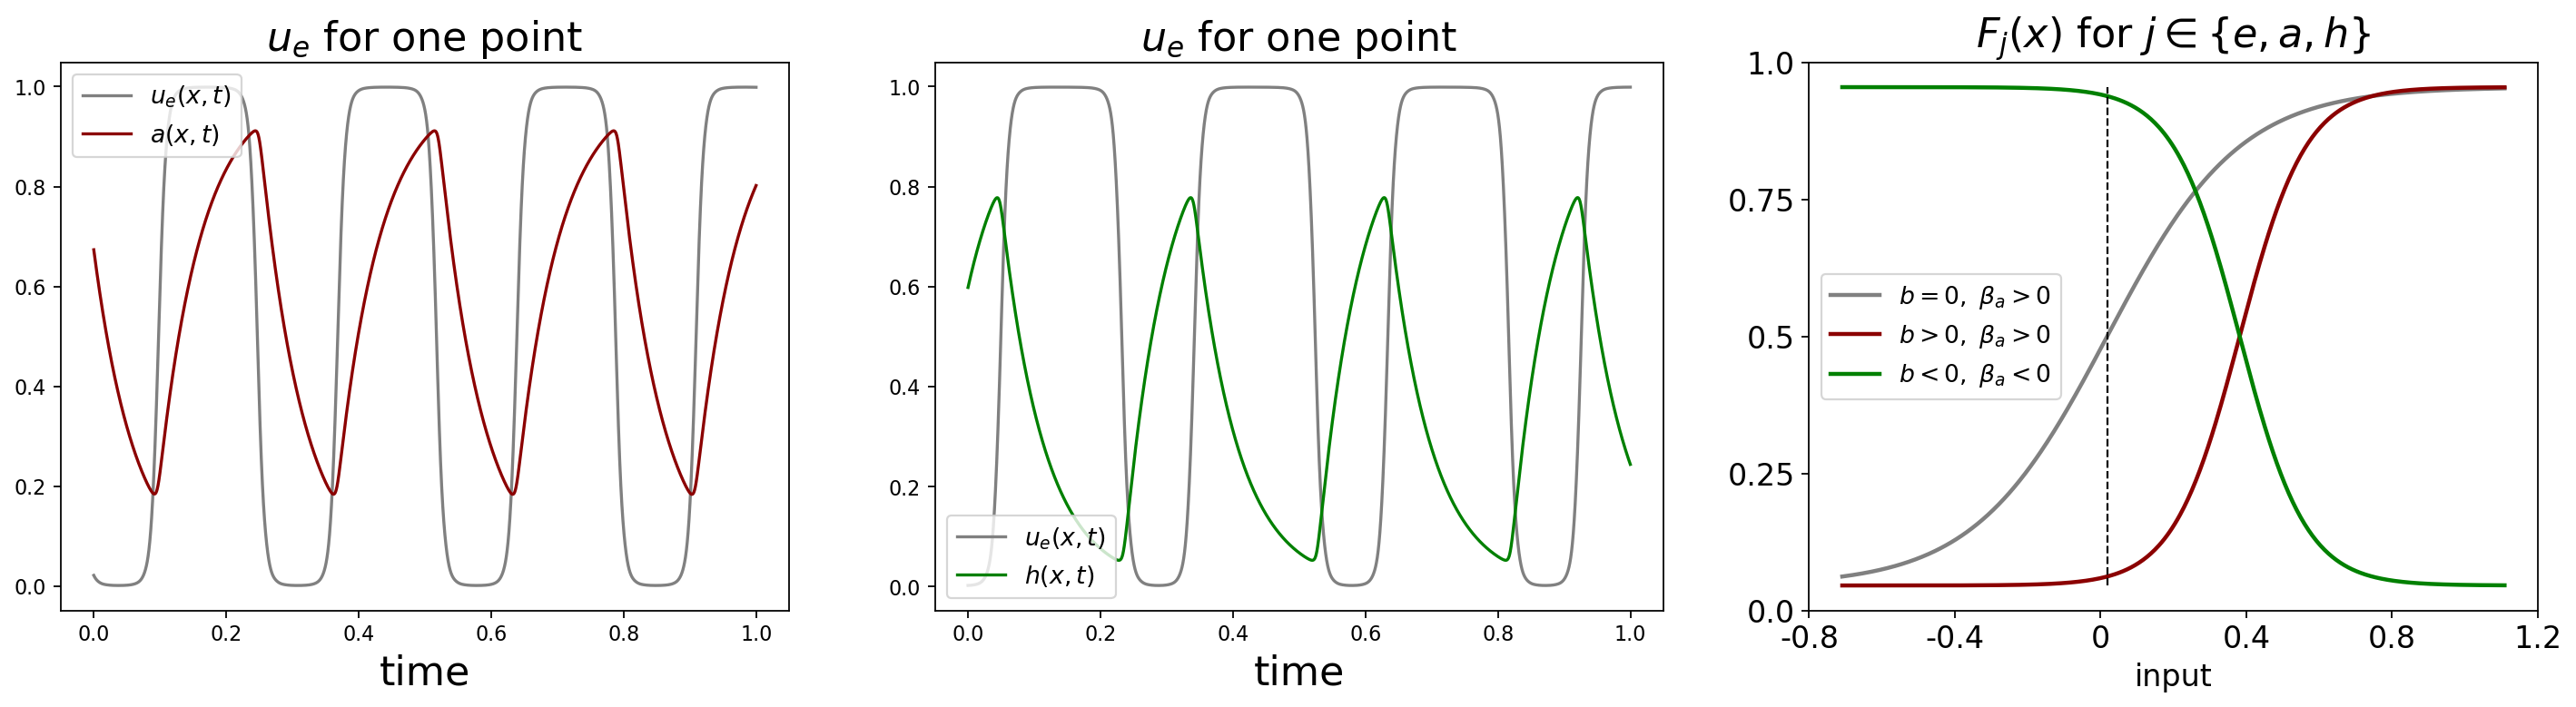

In [23]:
fig, axes = plt.subplots(1,3, figsize=(22,5), dpi=160)


axes[0].plot(time,uea,c='gray', label=r'$u_e(x,t)$')
axes[0].plot(time,a,c='darkred', label=r'$a(x,t)$')
axes[0].set_title(r'$u_e$ for one point', fontsize=tfs)
axes[0].set_xlabel(r'time', fontsize=tfs)

axes[1].plot(time,ueh,c='gray', label=r'$u_e(x,t)$')
axes[1].plot(time,h,c='green', label=r'$h(x,t)$')
axes[1].set_title('$u_e$ for one point', fontsize=tfs)
axes[1].set_xlabel(r'time', fontsize=tfs)

axes[2].plot(inp, fe, label=r'$b=0,\ \beta_a>0$', lw=2, c='gray')
axes[2].plot(inp, fa, label=r'$b>0,\ \beta_a>0$', lw=2, c='darkred')
axes[2].plot(inp, fa2, label=r'$b<0,\ \beta_a<0$', lw=2, c='green')
axes[2].set_title('$F_j(x)$ for $j\in\{e,a,h\}$', fontsize=tfs)
axes[2].plot(np.linspace(0-0.0001,0-0.0001,len(inp)), np.linspace(0,1,len(fe)), lw=1, c='black', ls='dashed')

axes[2].set_xlabel('input', fontsize=fs)
axes[2].xaxis.set_major_locator(ticker.LinearLocator(len(xlabels)))
axes[2].set_xticklabels(labels=xlabels, fontsize=tickfs)

axes[2].yaxis.set_major_locator(ticker.LinearLocator(len(ylabels)))
axes[2].set_yticklabels(labels=ylabels, fontsize=tickfs)

axes[0].legend(loc='upper left', fontsize=12)
axes[1].legend(loc='lower left', fontsize=12)
axes[2].legend(loc='center left', fontsize=12)
    
plt.show()

# Visualise kernel

In [24]:
params = setParams({'length': 50, 'n': 1600})

x = np.roll(params.x, round(params.n/2-1))[::-1]
ke = np.roll(params.ke, round(params.n/2-1))[::-1]
ki = np.roll(params.ki, round(params.n/2-1))[::-1]

combi = params.w_ee*ke-params.w_ei*ki

In [25]:
space_labels=[-params.length/2, -params.length/4, 0, params.length/4, params.length/2]
k_labels = [0, 0.005, 0.01, 0.015]

k_combi = [-0.01, 0, 0.02, 0.04]


/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/2018729421.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=space_labels, fontsize=tickfs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/2018729421.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=k_labels, fontsize=tickfs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/2018729421.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=space_labels, fontsize=tickfs)


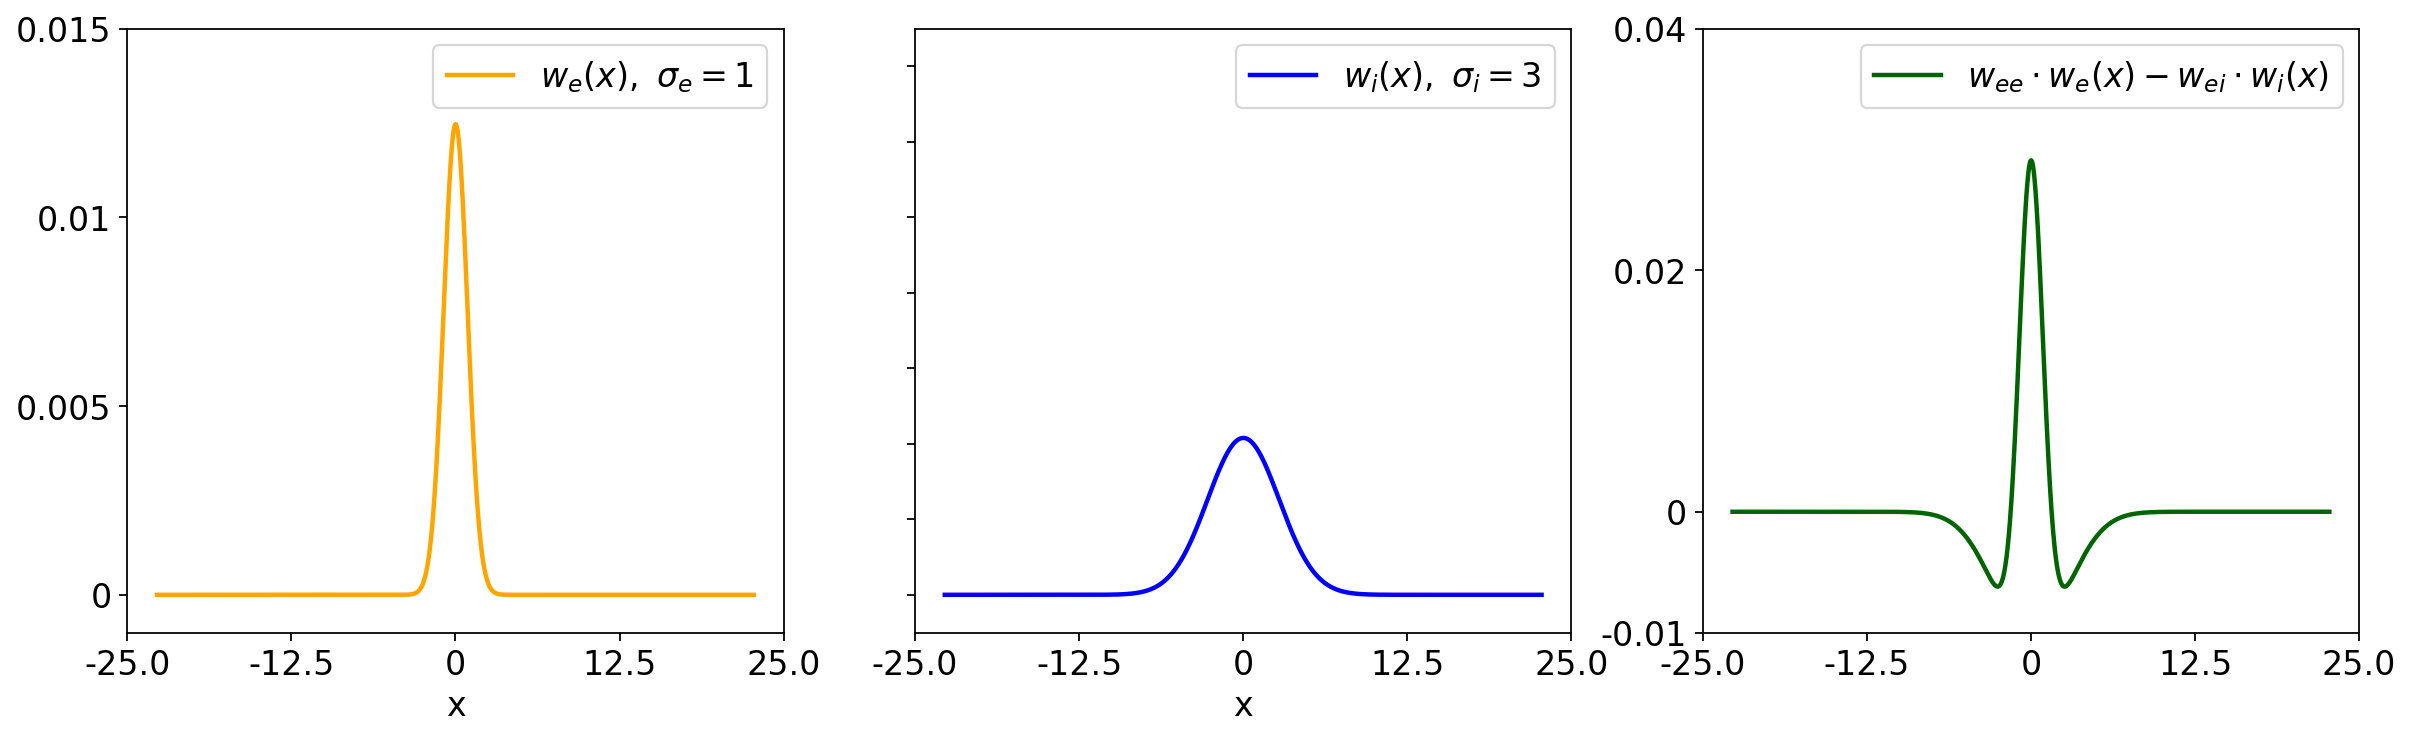

In [26]:
fig, (ax0, ax1, ax3) = plt.subplots(1, 3, figsize=(18,5), dpi=160)

ax0.plot(x, ke, label=r'$w_e(x),\ \sigma_e=1$', lw=lw, c='orange')
ax1.plot(x, ki, label=r'$w_i(x),\ \sigma_i=3$', lw=lw, c='blue')

# Unlink the third axis from sharing the y-axis
ax3.get_shared_y_axes().remove(ax0)
ax3.get_shared_y_axes().remove(ax1)


for ax in [ax0, ax1]:
    ax.set_xlabel('x', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels)))
    ax.set_xticklabels(labels=space_labels, fontsize=tickfs)

for ax in [ax0]:
    ax.set_ylim([min(k_labels)-0.001, max(k_labels)])
    ax.yaxis.set_major_locator(ticker.LinearLocator(len(k_labels)))
    ax.set_yticklabels(labels=k_labels, fontsize=tickfs)
    ax.set_yticks(k_labels, labels=k_labels, fontsize=tickfs)

for ax in [ax1]:
    ax.set_ylim([min(k_labels)-0.001, max(k_labels)])
    ax.set_yticklabels([])
    
    ax.legend(loc='upper right', fontsize=fs)

ax3.plot(x, combi, label=r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x)$', lw=lw, c='darkgreen')

#ax3.set_xlabel('space', fontsize=fs)
ax3.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels)))
ax3.set_xticklabels(labels=space_labels, fontsize=tickfs)
ax3.set_ylim([min(k_combi), max(k_combi)])
ax3.yaxis.set_major_locator(ticker.LinearLocator(len(k_combi)))
ax3.set_yticks(k_combi, labels=k_combi, fontsize=tickfs)

for ax in [ax0, ax1, ax3]:
    ax.legend(loc='upper right', fontsize=tickfs)

# Visualise regularity & Kuramoto-order paramter

In [27]:
#parameters for adaptation states
ee, ii = -0.1, -0.85
paramsa0={'I_e': ee, 'I_i': ii, 'b': 0.2, 'end_t': 30*1000, 'beta_a': 10,
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

ee1, ii1 = -0.42, -0.68
paramsa1 = {'I_e': ee1, 'I_i': ii1, 'b': 0.2, 'end_t': 30*1000, 'beta_a': 10, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

ee2, ii2 = -0.3, -0.55
paramsa2 = {'I_e': ee2, 'I_i': ii2, 'b': 0.2, 'end_t': 30*1000, 'beta_a': 10, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

In [28]:
#parameters for h-current states
eeh, iih = 0.3, -0.05
paramsh0={'I_e': eeh, 'I_i': iih, 'b': -0.2, 'end_t': 30*1000, 'beta_a': -10,
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

eeh1, iih1 = -0.75, -0.8
paramsh1 = {'I_e': eeh1, 'I_i': iih1, 'b': -0.2, 'end_t': 30*1000, 'beta_a': -10, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

eeh2, iih2 = -0.7, -0.9
paramsh2 = {'I_e': eeh2, 'I_i': iih2, 'b': -0.2, 'end_t': 30*1000, 'beta_a': -10, 
        'length': 800, 'n': 1600,
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

In [29]:
#compute fp-values of uncoupled system.
fpsa0, staba0 = run_fixedpoints(paramsa0)
vioa0 = run_violation(paramsa0, fpsa0[0])

print('without mechanism: fixed points %s, stability %s (1=stable, 0=unstable)' 
      %(str(fpsa0), str(staba0)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fpsa0[0]), str(vioa0)))

#compute fp-values of uncoupled system.
fpsa1, staba1 = run_fixedpoints(paramsa1)
vioa1 = run_violation(paramsa1, fpsa1[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fpsa1), str(staba1)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)' 
      %(str(fpsa1[0]), str(vioa1)))

#compute fp-values of uncoupled system.
fpsa2, staba2 = run_fixedpoints(paramsa2)
vioa2 = run_violation(paramsa2, fpsa2[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fpsa2), str(staba2)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fpsa2[0]), str(vioa2)))

without mechanism: fixed points [[0.34649086 0.40838643]], stability [0] (1=stable, 0=unstable)
the down-fp [0.34649086 0.40838643] undergoes the violations ((1, 0.518), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.13684054 0.14339225]], we have the corresponding stability [1] (1=stable, 0=unstable)
the down-fp [0.13684054 0.14339225] undergoes the violations ((1, 0.518), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.12687441 0.18443986]], we have the corresponding stability [1] (1=stable, 0=unstable)
the down-fp [0.12687441 0.18443986] undergoes the violations ((1, 0.6), (0, 0), (0, 0)) (0=no vio, 1=turing)


In [30]:
#compute fp-values of uncoupled system.
fpsh0, stabh0 = run_fixedpoints(paramsh0)
vioh0 = run_violation(paramsh0, fpsh0[0])

print('without mechanism: fixed points %s, stability %s (1=stable, 0=unstable)' 
      %(str(fpsh0), str(stabh0)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fpsh0[0]), str(vioh0)))

#compute fp-values of uncoupled system.
fpsh1, stabh1 = run_fixedpoints(paramsh1)
vioh1 = run_violation(paramsh1, fpsh1[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fpsh1), str(stabh1)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)' 
      %(str(fpsh1), str(vioh1)))

#compute fp-values of uncoupled system.
fpsh2, stabh2 = run_fixedpoints(paramsh2)
vioh2 = run_violation(paramsh2, fpsh2[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(fpsh2), str(stabh2)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(fpsh2[0]), str(vioh2)))

without mechanism: fixed points [[0.15548516 0.50770619]
 [0.80693259 0.99980942]
 [0.98642333 0.99999013]], stability [1, 0, 1] (1=stable, 0=unstable)
the down-fp [0.15548516 0.50770619] undergoes the violations ((1, 0.652), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.12313189 0.08647466]], we have the corresponding stability [1] (1=stable, 0=unstable)
the down-fp [[0.12313189 0.08647466]] undergoes the violations ((1, 0.454), (0, 0), (0, 0)) (0=no vio, 1=turing)
for the fixed points [[0.21880171 0.16408399]], we have the corresponding stability [0] (1=stable, 0=unstable)
the down-fp [0.21880171 0.16408399] undergoes the violations ((1, 0.44), (0, 0), (0, 0)) (0=no vio, 1=turing)


In [31]:
#activity for adaptation
uea0, _, _ = run(paramsa0, fp=fpsa0[0], wavenumber=vioa0[0][1], itype='rungekutta')

uea1, _, _ = run(paramsa1, fp=fpsa1[0], wavenumber=vioa1[0][1], itype='rungekutta')

uea2, _, _ = run(paramsa2, fp=fpsa2[0], wavenumber=vioa2[0][1], itype='rungekutta')

In [32]:
#activity for h-currents
ueh0, _, _ = run(paramsh0, fp=fpsh0[0], wavenumber=vioh0[0][1], itype='rungekutta')

ueh1, _, _ = run(paramsh1, fp=fpsh1[0], wavenumber=vioh1[0][1], itype='rungekutta')

ueh2, _, _ = run(paramsh2, fp=fpsh2[0], wavenumber=vioh2[0][1], itype='rungekutta')

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/759622017.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/759622017.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=tickfs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/759622017.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels, fontsize=tickfs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/759622017.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=tickfs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/759622017.py:74: UserWarning: This figure includes Axes that are not compatible wi

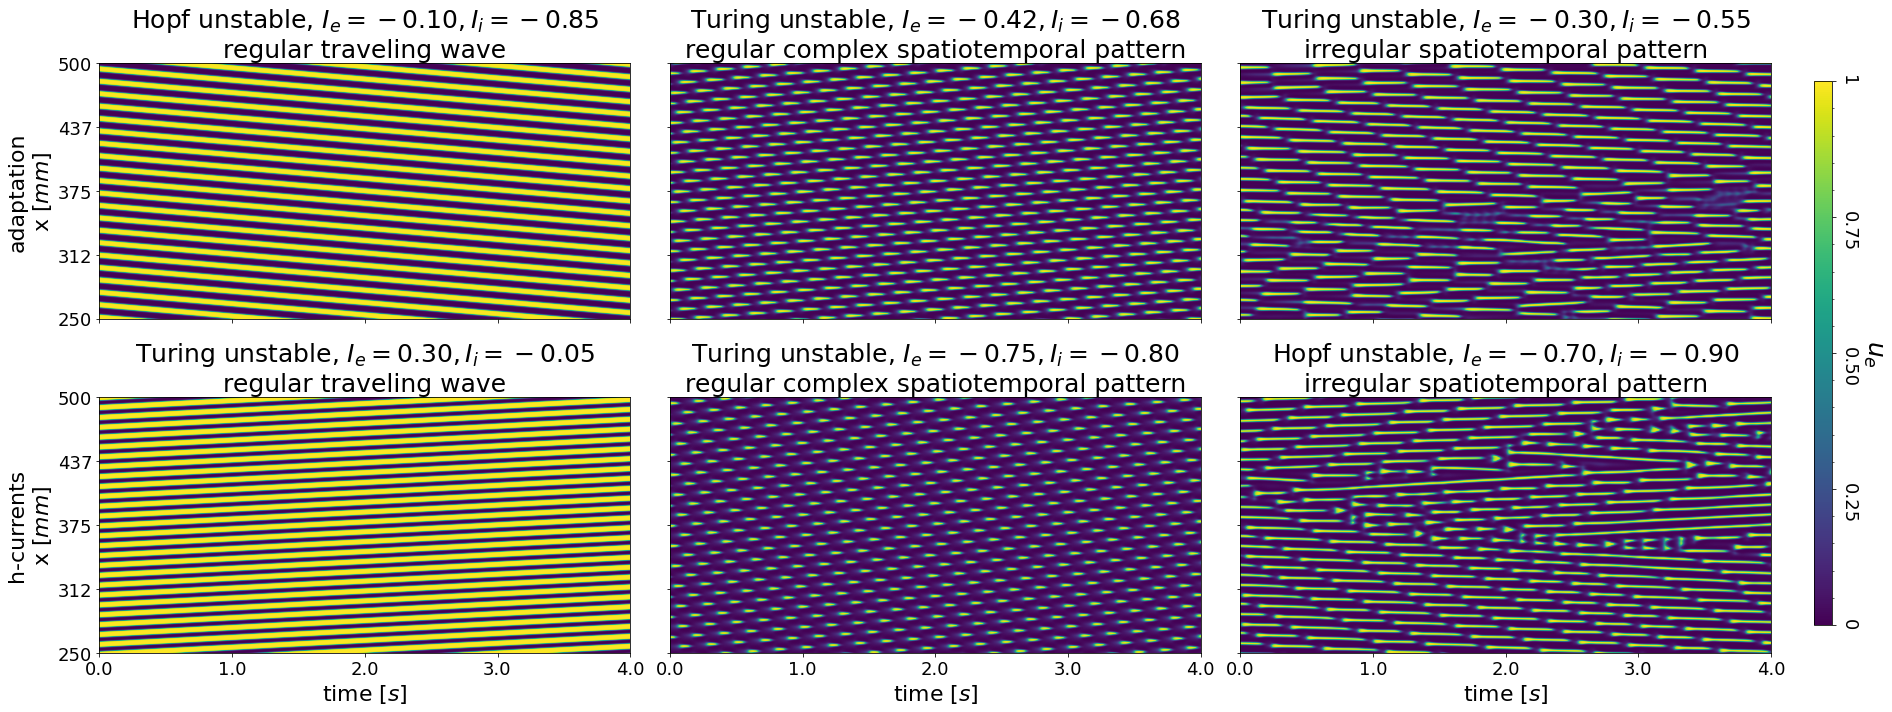

In [33]:
#get all parameters into the params-dict 
#to be able to call also the paramameters we didn't specifically define
paramsa0 = setParams(paramsa0)
tfs = 25
fs = 22
tickfs = 18

#visualize randomly initialized next to init in fp
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(25,10), 
                                                       sharey='row', sharex=True)

duration = 4
until = 0.1
vmin, vmax = 0, 1
nodes = [500, 1000]

#plot the corresponding activites
time_labels = np.linspace(0,duration,5)
space_labels = np.linspace(nodes[1]*paramsa0.dx, nodes[0]*paramsa0.dx, 5).astype(int)

#titles = ['Turing unstable down' + '\n' + 'without mechanism', 
#          'Turing unstable down' + '\n' + 'with adaptation',
#          'Turing unstable down' + '\n' + 'with h-current']

titles = [r'Hopf unstable, $I_e=%.2f, I_i=%.2f$' %(ee,ii) + '\n' + 'regular traveling wave', 
          r'Turing unstable, $I_e=%.2f, I_i=%.2f$' %(ee1,ii1) + '\n' + 'regular complex spatiotemporal pattern',
          r'Turing unstable, $I_e=%.2f, I_i=%.2f$' %(ee2,ii2) + '\n' + 'irregular spatiotemporal pattern']

ax0.imshow(uea0.T[nodes[0]:nodes[1],-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
ax1.imshow(uea1.T[nodes[0]:nodes[1],-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
pos = ax2.imshow(uea2.T[nodes[0]:nodes[1],-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')

titlesh = [r'Turing unstable, $I_e=%.2f, I_i=%.2f$' %(eeh,iih) + '\n' + 'regular traveling wave', 
          r'Turing unstable, $I_e=%.2f, I_i=%.2f$' %(eeh1,iih1) + '\n' + 'regular complex spatiotemporal pattern',
          r'Hopf unstable, $I_e=%.2f, I_i=%.2f$' %(eeh2,iih2) + '\n' + 'irregular spatiotemporal pattern']


ax3.imshow(ueh0.T[nodes[0]:nodes[1],-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
ax4.imshow(ueh1.T[nodes[0]:nodes[1],-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
pos = ax5.imshow(ueh2.T[nodes[0]:nodes[1],-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')



cbar_ticks = np.linspace(vmin, vmax,5)
cbar_labels = np.array(['0'])
cbar_labels2 = ['%.2f' %f for f in cbar_ticks[1:-1]]
cbar_labels = np.append(cbar_labels, cbar_labels2)
cbar_labels = np.append(cbar_labels, ['1'])
cb_ax = fig.add_axes([1.01,.126,.01,.755])
cbar = ax.figure.colorbar(pos, ax=ax2, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel(r'$u_e$', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=tickfs)
cbar.minorticks_on()

for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_title(titles[idx], fontsize=tfs)
   # ax.set_xlabel('time '+ r'$[s]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=fs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=tickfs)

for idx, ax in enumerate([ax3, ax4, ax5]):
    ax.set_title(titlesh[idx], fontsize=tfs)
    ax.set_xlabel('time '+ r'$[s]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=tickfs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=tickfs)
    
ax0.set_ylabel('adaptation' + '\n' + 'x ' + r'$[mm]$', fontsize=fs)
ax3.set_ylabel('h-currents' + '\n''x ' + r'$[mm]$', fontsize=fs)

plt.tight_layout()

### Determine Kuramoto-order Parameters & its Stand.Dev.

In [34]:
from funcs import getKuramotoOrder

In [35]:
duation = 15

In [36]:
ka0, kt = getKuramotoOrder(uea0[-int(duration*1000*(1/0.5)):,:])
ka1, kta = getKuramotoOrder(uea1[-int(duration*1000*(1/0.5)):,:])
ka2, kth = getKuramotoOrder(uea2[-int(duration*1000*(1/0.5)):,:])

In [37]:
kh0, kt = getKuramotoOrder(ueh0[-int(duration*1000*(1/0.5)):,:])
kh1, kta = getKuramotoOrder(ueh1[-int(duration*1000*(1/0.5)):,:])
kh2, kth = getKuramotoOrder(ueh2[-int(duration*1000*(1/0.5)):,:])

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/2409550854.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=np.linspace(0,15, 5).astype(int), fontsize=tickfs)


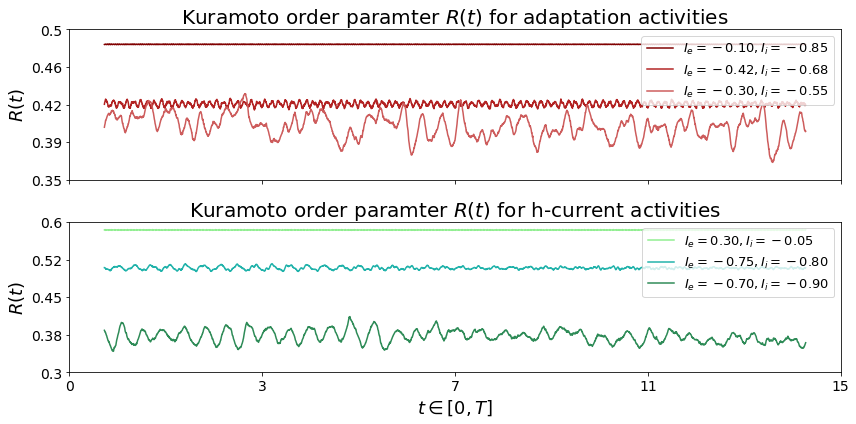

In [38]:
tfs = 20
fs = 18
tickfs=14
a_colors = ['maroon', 'firebrick', 'indianred']
h_colors = ['lightgreen', 'lightseagreen', 'seagreen']

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(12,6))

ax0.plot(ka0, c=a_colors[0], label=r'$I_e=%.2f, I_i=%.2f$' %(ee,ii))
ax0.plot(ka1, c=a_colors[1], label=r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1))
ax0.plot(ka2, c=a_colors[2], label=r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2))

ax1.plot(kh0, c=h_colors[0], label=r'$I_e=%.2f, I_i=%.2f$' %(eeh,iih))
ax1.plot(kh1, c=h_colors[1], label=r'$I_e=%.2f, I_i=%.2f$' %(eeh1,iih1))
ax1.plot(kh2, c=h_colors[2], label=r'$I_e=%.2f, I_i=%.2f$' %(eeh2,iih2))

titles = [r'Kuramoto order paramter $R(t)$ for adaptation activities',
          r'Kuramoto order paramter $R(t)$ for h-current activities']


for idx, ax in enumerate([ax0, ax1]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_ylabel(r'$R(t)$', fontsize=fs)


ax0.xaxis.set_major_locator(ticker.LinearLocator(5))
ax0.set_xticklabels(labels=[])

ax1.xaxis.set_major_locator(ticker.LinearLocator(5))
ax1.set_xticklabels(labels=np.linspace(0,15, 5).astype(int), fontsize=tickfs)
ax1.set_xlabel(r'$t\in[0, T]$', fontsize=fs)

lim = [0.35, 0.5]
ax0.set_ylim([lim[0],lim[1]])
ax0.set_yticks(np.linspace(lim[0],lim[1], 5), 
              labels=np.linspace(lim[0],lim[1], 5).round(2), 
              fontsize=tickfs)

lim = [0.3, 0.6]
ax1.set_ylim([lim[0],lim[1]])
ax1.set_yticks(np.linspace(lim[0],lim[1], 5), 
              labels=np.linspace(lim[0],lim[1], 5).round(2), 
              fontsize=tickfs)

ax0.legend(loc='upper right', fontsize=tickfs-1)
ax1.legend(loc='upper right', fontsize=tickfs-1)
plt.tight_layout()

In [39]:
ka0std, ka1std, ka2std = np.std(ka0, ddof=1),np.std(ka1, ddof=1),np.std(ka2, ddof=1)

kh0std, kh1std, kh2std = np.std(kh0, ddof=1),np.std(kh1, ddof=1),np.std(kh2, ddof=1)


Text(0, 0.5, '$r$')

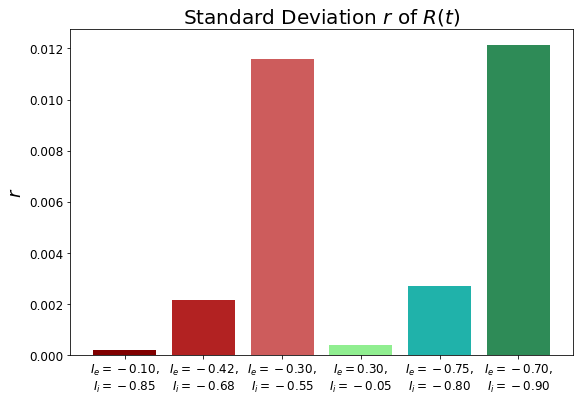

In [40]:
plt.figure(figsize=(9,6))

plt.bar([r'$I_e=%.2f$,'%ee + '\n' + r'$I_i=%.2f$' %ii, 
         r'$I_e=%.2f$,'%ee1 + '\n' + r'$I_i=%.2f$' %ii1, 
         r'$I_e=%.2f$,'%ee2 + '\n' + r'$I_i=%.2f$' %ii2], [ka0std, ka1std, ka2std], color=a_colors)
plt.bar([r'$I_e=%.2f$,'%eeh + '\n' + r'$I_i=%.2f$' %iih, 
         r'$I_e=%.2f$,'%eeh1 + '\n' + r'$I_i=%.2f$' %iih1, 
         r'$I_e=%.2f$,'%eeh2 + '\n' + r'$I_i=%.2f$' %iih2], [kh0std, kh1std, kh2std], color=h_colors)
plt.title(r'Standard Deviation $r$ of $R(t)$', fontsize=tfs)
plt.xticks(fontsize=tickfs-2)
plt.yticks(fontsize=tickfs-2)
plt.ylabel(r'$r$', fontsize=fs)

# Visualise Seed-Initialisation

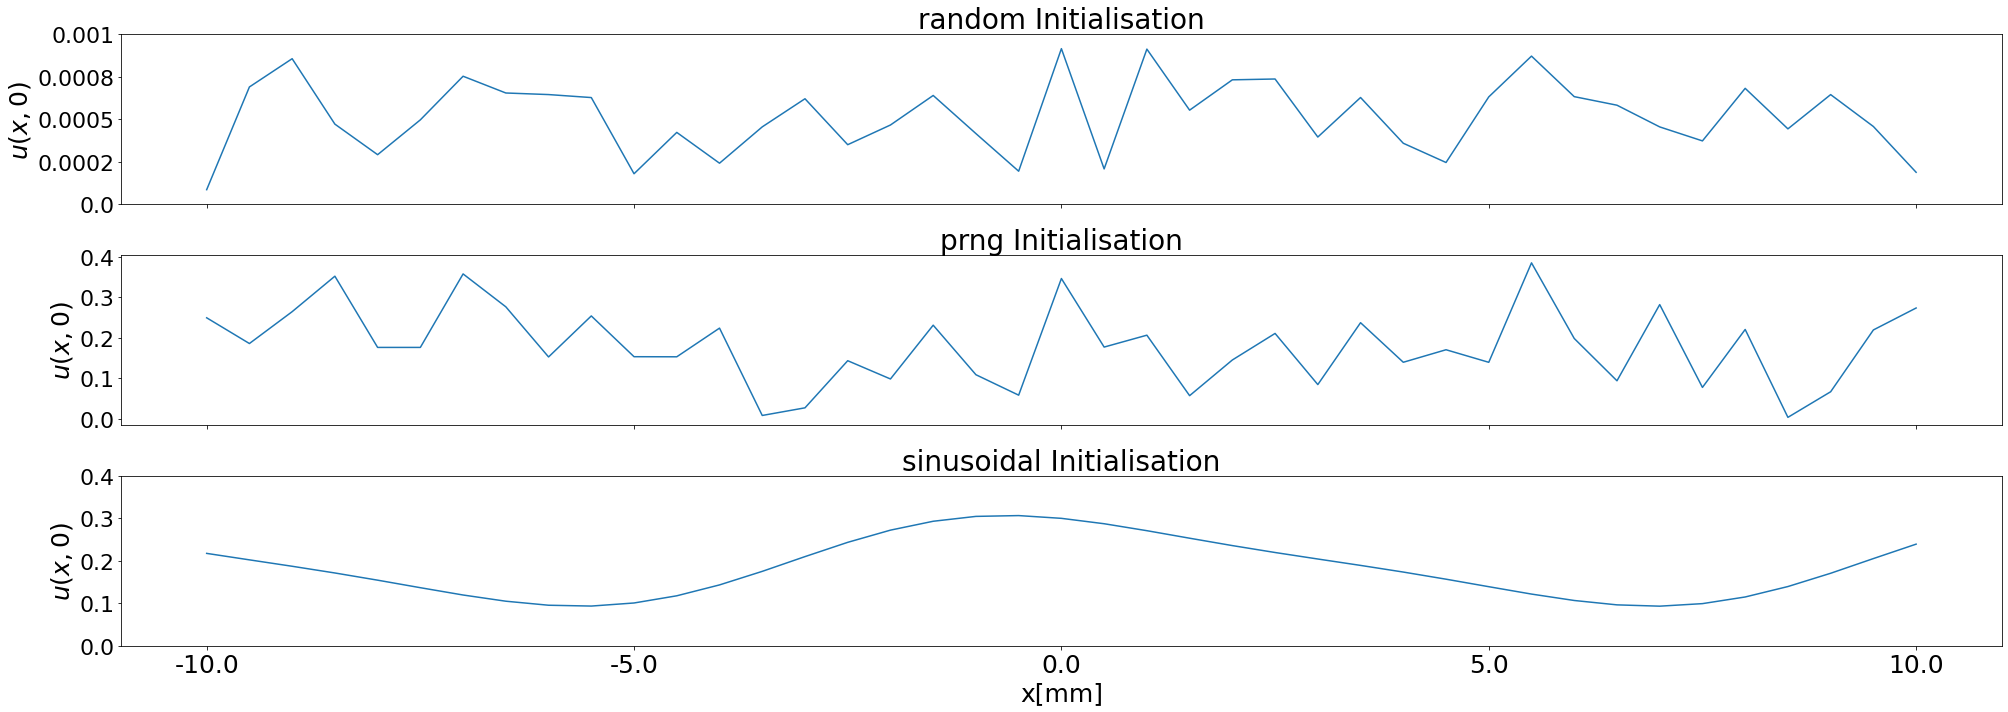

In [41]:
fp=0.2

tfs=28
fs=25
tickfs=22

length = 20
n=41
x = np.linspace(-length/2,length/2,n)
wavelength = 2*np.pi / 0.5
m = length/wavelength
wave_in_pi = (2*np.pi*m) / length
phi = np.pi
seed_amp = 0.1


values0 = np.random.uniform(0.0, 0.001, n)
#fit as many sinus waves into the ring as the length allows w.r.t. the max spatial wavenumber for which the turing state lost stability
#not needed anymore: xes = np.linspace(0,2*np.pi*int(length/wavelength), len(array)) 
# Set the seed for reproducibility
np.random.seed(42)
# Generate random numbers with a normal distribution around 0
noise = np.random.normal(loc=0, scale=seed_amp, size=n)
# Add the fixed value to the noise
values1 = fp + noise

values2 = fp + seed_amp * (np.cos(wave_in_pi * x) + 0.2 * np.sin(2 * wave_in_pi * x + phi))


fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize=(28,10))
ax0.plot(x, values0)
ax0.set_title('random Initialisation', fontsize=tfs)
ax0.set_yticks(np.linspace(-0.0001,0.0011,5), np.linspace(0,0.001,5).round(4), fontsize=tickfs)

ax1.plot(x, values1)
ax1.set_title('prng Initialisation', fontsize=tfs)

ax2.plot(x, values2)
ax2.set_title('sinusoidal Initialisation', fontsize=tfs)
ax2.set_xlabel('x[mm]', fontsize=fs)

for ax in [ax1, ax2]:
    ax.set_yticks(np.linspace(-0.0001,0.4,5), np.linspace(0,0.4,5).round(2), fontsize=tickfs)  

for ax in [ax0, ax1, ax2]:
    ax.set_xticks(ticks=x[::10], labels=[])
    ax.set_ylabel(r'$u(x,0)$', fontsize=fs)
    
ax2.set_xticks(ticks=x[::10], labels=x[::10], fontsize=fs)

plt.tight_layout()




# Visualise Average Distance 

In [42]:
from funcs import getPSD
from scipy.signal import find_peaks_cwt

In [43]:
ee = 0.4
ii = 0.01
dist_params = {'I_e': ee, 'I_i': ii, 'b': -0.2, 'end_t': 30*1000, 'beta_a': -10, 'dt': 0.5,
        'length': 800, 'n': 1600,  
        'seed': True, 'seed_func': 'sinus', 'seed_amp': 0.1}

dist_params=setParams(dist_params)

#compute fp-values of uncoupled system and their corresponding stability.
dist_fps, dist_stab = run_fixedpoints(dist_params)
dist_vio = run_violation(dist_params, dist_fps[0])

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' 
      %(str(dist_fps), str(dist_stab)))
print('the down-fp %s undergoes the violations %s (0=no vio, 1=turing)'
       %(str(dist_fps[0]), str(dist_vio)))

for the fixed points [[0.15788219 0.54758568]
 [0.75629016 0.99967464]
 [0.99247822 0.99999338]], we have the corresponding stability [1, 0, 1] (1=stable, 0=unstable)
the down-fp [0.15788219 0.54758568] undergoes the violations ((1, 0.646), (0, 0), (0, 0)) (0=no vio, 1=turing)


In [44]:
dist_ue, _, _ = run(dist_params, fp=dist_fps[0], wavenumber=dist_vio[0][1], itype='rungekutta')

In [47]:
node = 300
duration = 5
dist_act = dist_ue.T[:,-int(duration*1000*(dist_params.dt))]

In [48]:
#compute the dominant frequency to identify in which range the length of one up state might lie
frequs, psd = getPSD(dist_act, fs=1000 * (1/dist_params.dt), nperseg=5)
domf = frequs[np.argmax(psd)]
peak_length = ((1000*(1/dist_params.dt))/2) / domf

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 10000 is greater than input length  = 1600, using nperseg = 1600
  warnings.warn('nperseg = {0:d} is greater than input length '


In [49]:
peaks = find_peaks_cwt(dist_act, np.arange(int(peak_length-(peak_length/4)),int(peak_length+(peak_length/4))))

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/1409946203.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = np.linspace(0,2,5).round(5), fontsize=tickfs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/1409946203.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=np.linspace(-dist_params.length/2,dist_params.length/2, 5).astype(int), fontsize=tickfs)


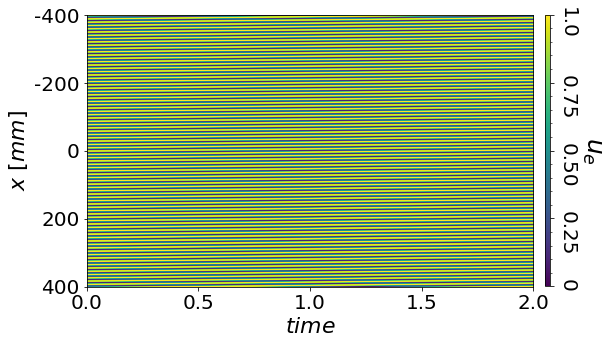

In [70]:
tfs, fs, tickfs = 25, 22, 20

fig, ax = plt.subplots(1,1,figsize=(8,5))

pos = ax.imshow(dist_ue.T[:,int(28*1000*(1/dist_params.dt)):], vmin=0, vmax=1, aspect='auto')


ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_xticklabels(labels = np.linspace(0,2,5).round(5), fontsize=tickfs)
ax.set_xlabel(r'$time$', fontsize=fs)
ax.yaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_yticklabels(labels=np.linspace(-dist_params.length/2,dist_params.length/2, 5).astype(int), fontsize=tickfs)
ax.set_ylabel(r'$x\ [mm]$', fontsize=fs)

cbar_ticks = np.linspace(0, 1,5)
cbar_labels = np.array(['0'])
cbar_labels2 = ['%.2f' %f for f in cbar_ticks[1:-1]]
cbar_labels = np.append(cbar_labels, cbar_labels2)
cbar_labels = np.append(cbar_labels, ['1.0'])
cb_ax = fig.add_axes([0.92,.126,.01,.755])
cbar = ax.figure.colorbar(pos, ax=ax2, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel(r'$u_e$', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=tickfs)
cbar.minorticks_on()



/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5808/3082767416.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = np.linspace(params.dx*100,params.dx*300,5).round(2), fontsize=tickfs)


Text(0, 0.5, '$u_e(x,\\bar{t})$')

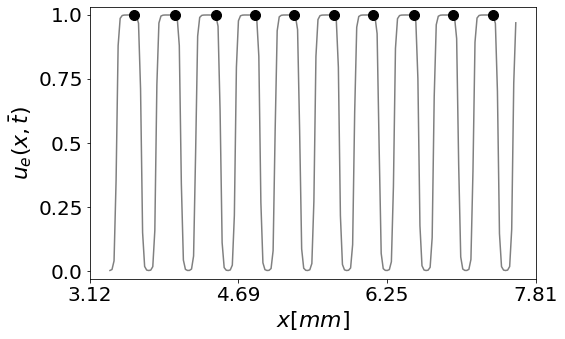

In [58]:
tfs, fs, tickfs = 25, 22, 20

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(dist_act[100:300], color='gray')
ax.scatter(peaks[:10], dist_act[peaks[:10]], s=100, color='black', zorder=2)

ax.xaxis.set_major_locator(ticker.LinearLocator(4))
ax.set_xticklabels(labels = np.linspace(params.dx*100,params.dx*300,5).round(2), fontsize=tickfs)
ax.set_xlabel(r'$x [mm]$', fontsize=fs)
ax.yaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_ylim([-0.03,1.03])
ax.set_yticks(np.linspace(0.0,1,5), labels = np.linspace(0,1,5).round(2), fontsize=tickfs)
ax.set_ylabel(r'$u_e(x,\bar{t})$', fontsize=fs)

In [2]:

import numpy as np
stab = np.array([0,0,1])

fps = np.array([[0,0],[1,1],[2,2]])

fps[stab==1][0]

array([2, 2])